<a href="https://colab.research.google.com/github/swguo/Plant-Classification/blob/main/%5BPlant%5D_Flower_Detection_on_CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
from PIL import Image
import torch
import argparse,requests
from transformers import CLIPProcessor, CLIPModel

## Setting

In [ ]:
_NAMES = [
    "pink primrose",
    "hard-leaved pocket orchid",
    "canterbury bells",
    "sweet pea",
    "english marigold",
    "tiger lily",
    "moon orchid",
    "bird of paradise",
    "monkshood",
    "globe thistle",
    "snapdragon",
    "colt's foot",
    "king protea",
    "spear thistle",
    "yellow iris",
    "globe-flower",
    "purple coneflower",
    "peruvian lily",
    "balloon flower",
    "giant white arum lily",
    "fire lily",
    "pincushion flower",
    "fritillary",
    "red ginger",
    "grape hyacinth",
    "corn poppy",
    "prince of wales feathers",
    "stemless gentian",
    "artichoke",
    "sweet william",
    "carnation",
    "garden phlox",
    "love in the mist",
    "mexican aster",
    "alpine sea holly",
    "ruby-lipped cattleya",
    "cape flower",
    "great masterwort",
    "siam tulip",
    "lenten rose",
    "barbeton daisy",
    "daffodil",
    "sword lily",
    "poinsettia",
    "bolero deep blue",
    "wallflower",
    "marigold",
    "buttercup",
    "oxeye daisy",
    "common dandelion",
    "petunia",
    "wild pansy",
    "primula",
    "sunflower",
    "pelargonium",
    "bishop of llandaff",
    "gaura",
    "geranium",
    "orange dahlia",
    "pink-yellow dahlia?",
    "cautleya spicata",
    "japanese anemone",
    "black-eyed susan",
    "silverbush",
    "californian poppy",
    "osteospermum",
    "spring crocus",
    "bearded iris",
    "windflower",
    "tree poppy",
    "gazania",
    "azalea",
    "water lily",
    "rose",
    "thorn apple",
    "morning glory",
    "passion flower",
    "lotus",
    "toad lily",
    "anthurium",
    "frangipani",
    "clematis",
    "hibiscus",
    "columbine",
    "desert-rose",
    "tree mallow",
    "magnolia",
    "cyclamen",
    "watercress",
    "canna lily",
    "hippeastrum",
    "bee balm",
    "ball moss",
    "foxglove",
    "bougainvillea",
    "camellia",
    "mallow",
    "mexican petunia",
    "bromelia",
    "blanket flower",
    "trumpet creeper",
    "blackberry lily",
]

## Main Program (Image2Text)

In [ ]:
class Image2Text:
    def __init__(self,base_model):
        model_name = base_model
        self.model = CLIPModel.from_pretrained(f"{model_name}")
        self.processor = CLIPProcessor.from_pretrained(f"{model_name}")

    def predict(self,image_url):

        image = Image.open(requests.get(image_url, stream=True).raw)

        inputs = self.processor(
            text=_NAMES, images=image, return_tensors="pt", padding=True
        )

        outputs = self.model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1)
        class_id = torch.argmax(probs)
        return class_id.item()

In [ ]:
def run(base_model, image_url):

    image2txt = Image2Text(base_model)

    y_pred = image2txt.predict(image_url = image_url)

    print(f'y_pred : Class_id : {y_pred}, Name : {_NAMES[y_pred]}')

## Inference

In [ ]:
from IPython.display import display # to display images
import requests
from PIL import Image

### frangipani 雞蛋花

In [ ]:
base_model = 'openai/clip-vit-large-patch14'
image_url = 'https://zurma.co.nz/cdn/shop/products/frangipaniabsolute_x668@2x.jpg'

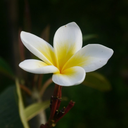

In [ ]:

size = 128, 128
im = Image.open(requests.get(image_url, stream=True).raw)
im.thumbnail(size, Image.Resampling.LANCZOS)
display(im)

In [ ]:
run(base_model, image_url)

y_pred : Class_id : 80, Name : frangipani


### Yellow Iris (黃鳶尾)

In [ ]:
base_model = 'openai/clip-vit-large-patch14'
image_url = 'https://www.vmcdn.ca/f/files/orilliamatters/images/outdoors/yellow-iris-002.JPG'

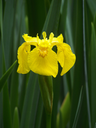

In [ ]:

size = 128, 128
im = Image.open(requests.get(image_url, stream=True).raw)
im.thumbnail(size, Image.Resampling.LANCZOS)
display(im)

In [ ]:
run(base_model, image_url)

y_pred : Class_id : 14, Name : yellow iris


## Flower 102 Names


| Item No. | English Name                   | Chinese Name             |
|----------|--------------------------------|--------------------------|
| 1        | Pink Primrose                  | 粉色報春花               |
| 2        | Hard-leaved Pocket Orchid      | 硬葉袋蘭                 |
| 3        | Canterbury Bells               | 康乃馨鐘花               |
| 4        | Sweet Pea                      | 甜豌豆                   |
| 5        | English Marigold               | 英國萬壽菊               |
| 6        | Tiger Lily                     | 虎百合                   |
| 7        | Moon Orchid                    | 月蘭                     |
| 8        | Bird of Paradise               | 天堂鳥                   |
| 9        | Monkshood                      | 狼毒花                   |
| 10       | Globe Thistle                  | 球蓟                     |
| 11       | Snapdragon                     | 金魚草                   |
| 12       | Colt's Foot                    | 款冬花                   |
| 13       | King Protea                    | 國王鳳冠                 |
| 14       | Spear Thistle                  | 長矛薊                   |
| 15       | Yellow Iris                    | 黃鳶尾                   |
| 16       | Globe-flower                   | 球花                     |
| 17       | Purple Coneflower              | 紫錐花                   |
| 18       | Peruvian Lily                  | 秘魯百合                 |
| 19       | Balloon Flower                 | 桔梗                     |
| 20       | Giant White Arum Lily          | 巨大白色海芋             |
| 21       | Fire Lily                      | 火百合                   |
| 22       | Pincushion Flower              | 針球花                   |
| 23       | Fritillary                     | 貫葉                     |
| 24       | Red Ginger                     | 紅薑                     |
| 25       | Grape Hyacinth                 | 風信子                   |
| 26       | Corn Poppy                     | 罌粟                     |
| 27       | Prince of Wales Feathers       | 威爾斯王子的羽毛         |
| 28       | Stemless Gentian               | 無梗龍膽                 |
| 29       | Artichoke                      | 朝鮮薊                   |
| 30       | Sweet William                  | 庭院石竹                 |
| 31       | Carnation                      | 康乃馨                   |
| 32       | Garden Phlox                   | 園丁福祿考               |
| 33       | Love in the Mist               | 薄霧中的愛               |
| 34       | Mexican Aster                  | 墨西哥紫菀               |
| 35       | Alpine Sea Holly               | 高山刺葵                 |
| 36       | Ruby-lipped Cattleya           | 紅唇卡特里亞             |
| 37       | Cape Flower                    | 開普花                   |
| 38       | Great Masterwort               | 大繡球花                 |
| 39       | Siam Tulip                     | 暹羅鬱金香               |
| 40       | Lenten Rose                    | 四旬節玫瑰               |
| 41       | Barbeton Daisy                 | 巴貝頓雛菊               |
| 42       | Daffodil                       | 水仙                     |
| 43       | Sword Lily                     | 劍百合                   |
| 44       | Poinsettia                     | 一品紅                   |
| 45       | Bolero Deep Blue               | 波萊羅深藍               |
| 46       | Wallflower                     | 墻花                     |
| 47       | Marigol                        | 萬壽菊                   |
| 48       | Buttercup                      | 毛茛                     |
| 49       | Oxeye Daisy                    | 牛眼菊                   |
| 50       | Common Dandelion               | 蒲公英                   |
| 51       | Petunia                        | 矮牽牛                   |

| Item No. | English Name                   | Chinese Name             |
|----------|--------------------------------|--------------------------|
| 52       | Wild Pansy                     | 野生三色堇               |
| 53       | Primula                        | 報春花                   |
| 54       | Sunflower                      | 向日葵                   |
| 55       | Pelargonium                    | 天竺葵                   |
| 56       | Bishop of Llandaff             | 蘭達夫主教               |
| 57       | Gaura                          | 草珊瑚                   |
| 58       | Geranium                       | 老鷹爪                   |
| 59       | Orange Dahlia                  | 橙色大麗花               |
| 60       | Pink-yellow Dahlia             | 粉黃大麗花               |
| 61       | Cautleya spicata               | 花蔓姜                   |
| 62       | Japanese Anemone               | 日本銀蓮花               |
| 63       | Black-eyed Susan               | 黑眼蘇珊                 |
| 64       | Silverbush                     | 銀灌木                   |
| 65       | Californian Poppy              | 加州罌粟                 |
| 66       | Osteospermum                   | 非洲菊                   |
| 67       | Spring Crocus                  | 春番紅花                 |
| 68       | Bearded Iris                   | 鬚鳶尾                   |
| 69       | Windflower                     | 風花                     |
| 70       | Tree Poppy                     | 樹罌粟                   |
| 71       | Gazania                        | 百日菊                   |
| 72       | Azalea                         | 杜鵑花                   |
| 73       | Water Lily                     | 睡蓮                     |
| 74       | Rose                           | 玫瑰                     |
| 75       | Thorn Apple                    | 曼陀羅                   |
| 76       | Morning Glory                  | 牽牛花                   |
| 77       | Passion Flower                 | 西番蓮                   |
| 78       | Lotus                          | 蓮花                     |
| 79       | Toad Lily                      | 蟾蜍百合                 |
| 80       | Anthurium                      | 花烏頭                   |
| 81       | Frangipani                     | 鳳仙花                   |
| 82       | Clematis                       | 鐵線蓮                   |
| 83       | Hibiscus                       | 木槿                     |
| 84       | Columbine                      | 耧斗菜                   |
| 85       | Desert-rose                    | 沙漠玫瑰                 |
| 86       | Tree Mallow                    | 樹錦葵                   |
| 87       | Magnolia                       | 木蘭花                   |
| 88       | Cyclamen                       | 仙客來                   |
| 89       | Watercress                     | 西洋菜                   |
| 90       | Canna Lily                     | 美人蕉                   |
| 91       | Hippeastrum                    | 孤挺花                   |
| 92       | Bee Balm                       | 馬鞭草                   |
| 93       | Ball Moss                      | 球蘚                     |
| 94       | Foxglove                       | 洋地黃                   |
| 95       | Bougainvillea                  | 九重葛                   |
| 96       | Camellia                       | 山茶花                   |
| 97       | Mallow                         | 錦葵                     |
| 98       | Mexican Petunia                | 墨西哥牽牛               |
| 99       | Bromelia                       | 鳳梨科                   |
| 100      | Blanket Flower                 | 蓋毯花                   |
| 101      | Trumpet Creeper                | 喇叭藤                   |
| 102      | Blackberry Lily                | 黑莓百合                 |